**Task 3 intro**

Exploratory analysis, uploading and understanding the data, preparing data for model usage

In [ ]:
import glob, re, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

In [ ]:
device = 'cuda'

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Jul 31 22:23:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%run /content/drive/MyDrive/Colab_Notebooks/cardiac_ml_tools.py

In [ ]:
!chmod +x /content/drive/MyDrive/Colab_Notebooks/cardiac_challenge-main/download_intracardiac_dataset.sh

In [ ]:
!/content/drive/MyDrive/Colab_Notebooks/cardiac_challenge-main/download_intracardiac_dataset.sh

Streaming output truncated to the last 5000 lines.
data_hearts_dd_0p2_geo_inn_act_2_bcl_I/VmData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.1000.innerindex.4.volunteer.v1.npy
data_hearts_dd_0p2_geo_inn_act_2_bcl_I/pECGData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.600.innerindex.60.volunteer.v6.npy
data_hearts_dd_0p2_geo_inn_act_2_bcl_I/VmData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.600.innerindex.16.volunteer.v1.npy
data_hearts_dd_0p2_geo_inn_act_2_bcl_I/pECGData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.600.innerindex.8.volunteer.v9.npy
data_hearts_dd_0p2_geo_inn_act_2_bcl_I/pECGData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.600.innerindex.16.volunteer.v12.npy
data_hearts_dd_0p2_geo_inn_act_2_bcl_I/VmData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.1000.innerindex.26.volunteer.v9.npy
data_hearts_dd_0p2_geo_inn_act_2_bcl_I/VmData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.600.innerindex.15.volunteer.v2.npy
data_hearts_dd_0p2_geo_inn_act_2_bcl_I/pECGData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.1000.innerindex.10.volu

In [ ]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR='/content/drive/MyDrive/Colab_Notebooks/intracardiac_dataset/' # This should be the path to the intracardiac_dataset, it can be downloaded using data_science_challenge_2023/download_intracardiac_dataset.sh
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)
file_pairs = read_data_dirs(data_dirs)
print('Number of file pairs: {}'.format(len(file_pairs)))
# example of file pair
print("Example of file pair:")
print("{}\n{}".format(file_pairs[0][0], file_pairs[0][1]))


Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sort

Case 213 : /content/drive/MyDrive/Colab_Notebooks/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_2_bcl_I/pECGData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.1000.innerindex.24.volunteer.v8.npy


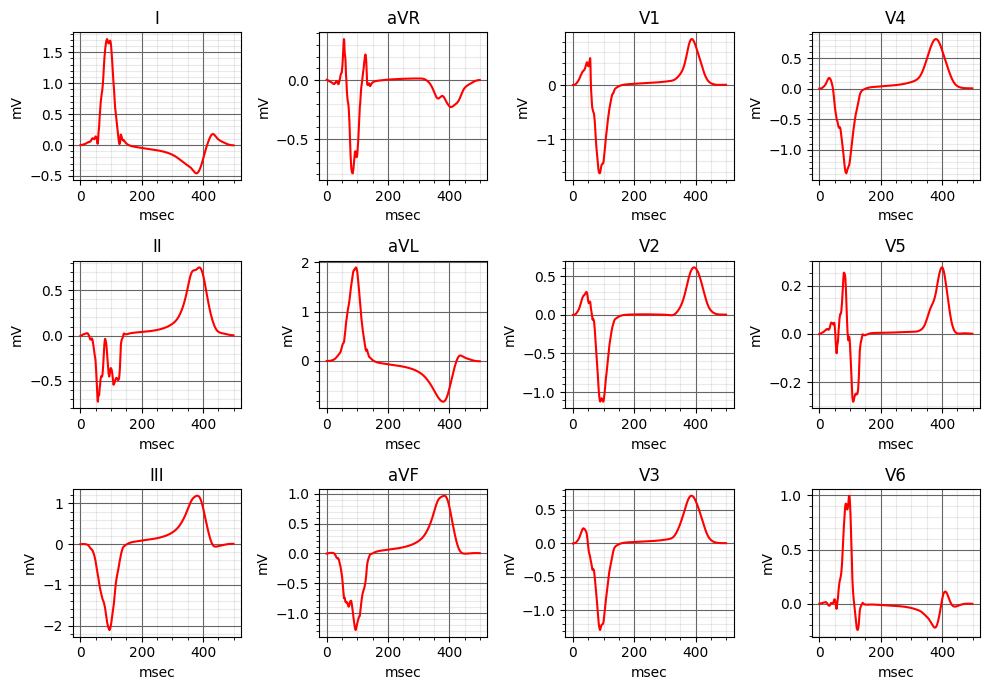

In [ ]:
# Example of file pair
case = 213
# ECG plot
row = 3
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

# create a figure with 12 subplots
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()


Case 213 : /content/drive/MyDrive/Colab_Notebooks/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_2_bcl_I/pECGData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.1000.innerindex.24.volunteer.v8.npy


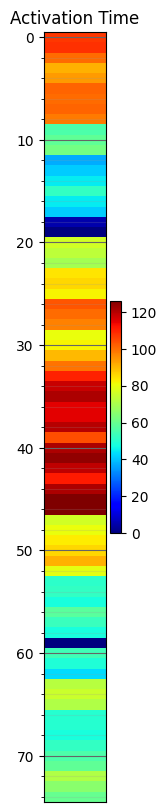

In [ ]:
# Example of file pair
case = 213
plt.figure(figsize=(1, 10))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

ActTime = get_activation_time(VmData)

# plot the Activation Time array
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

Case 213 : /content/drive/MyDrive/Colab_Notebooks/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_2_bcl_I/pECGData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.1000.innerindex.24.volunteer.v8.npy
Case 213 : /content/drive/MyDrive/Colab_Notebooks/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_2_bcl_I/pECGData_hearts_dd_0p2_geo_inn_act_2_bcl_I_bcl.1000.innerindex.24.volunteer.v8.npy


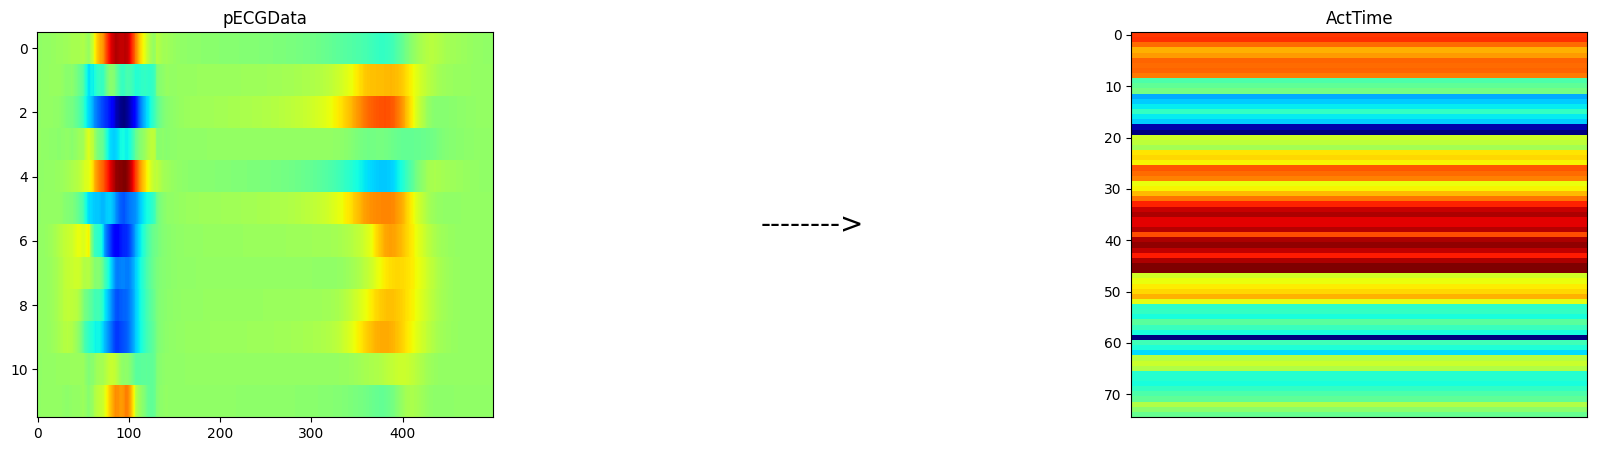

In [ ]:
# make a plot with the "pECGData" -> "ActTime"
case = 213

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])
ActTime = get_activation_time(VmData)

# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
row = 1
column = 3
plt.figure(figsize=(20, 5))
plt.subplot(row, column, 1)
# plot pECGData transposed
plt.imshow(pECGData.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('pECGData')
plt.subplot(row, column, 2)
# print an arrow
plt.text(0.5, 0.5, '-------->', horizontalalignment='center', verticalalignment='center', fontsize=20)
plt.axis('off')
plt.subplot(row, column, 3)
# plot ActTime
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
# not xticks
plt.xticks([])
plt.title('ActTime')
plt.show()
plt.close()


In [ ]:
print('Case number: 1')
print('Index: 0')
index_zero = np.load(file_pairs[1][0])
print(index_zero.shape)
print('Index: 1')
index_one = np.load(file_pairs[1][1])
print(index_one.shape)

Case number: 1
Index: 0
(500, 10)
Index: 1
(500, 75)


We need to convert 500x10 --> 500x12 and 500x75 --> 1x75.